In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# DataFrame creation
df = pd.read_csv("3.1_RS_ROC_Trend.csv") 
df = df.drop(columns = ['No.'])
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

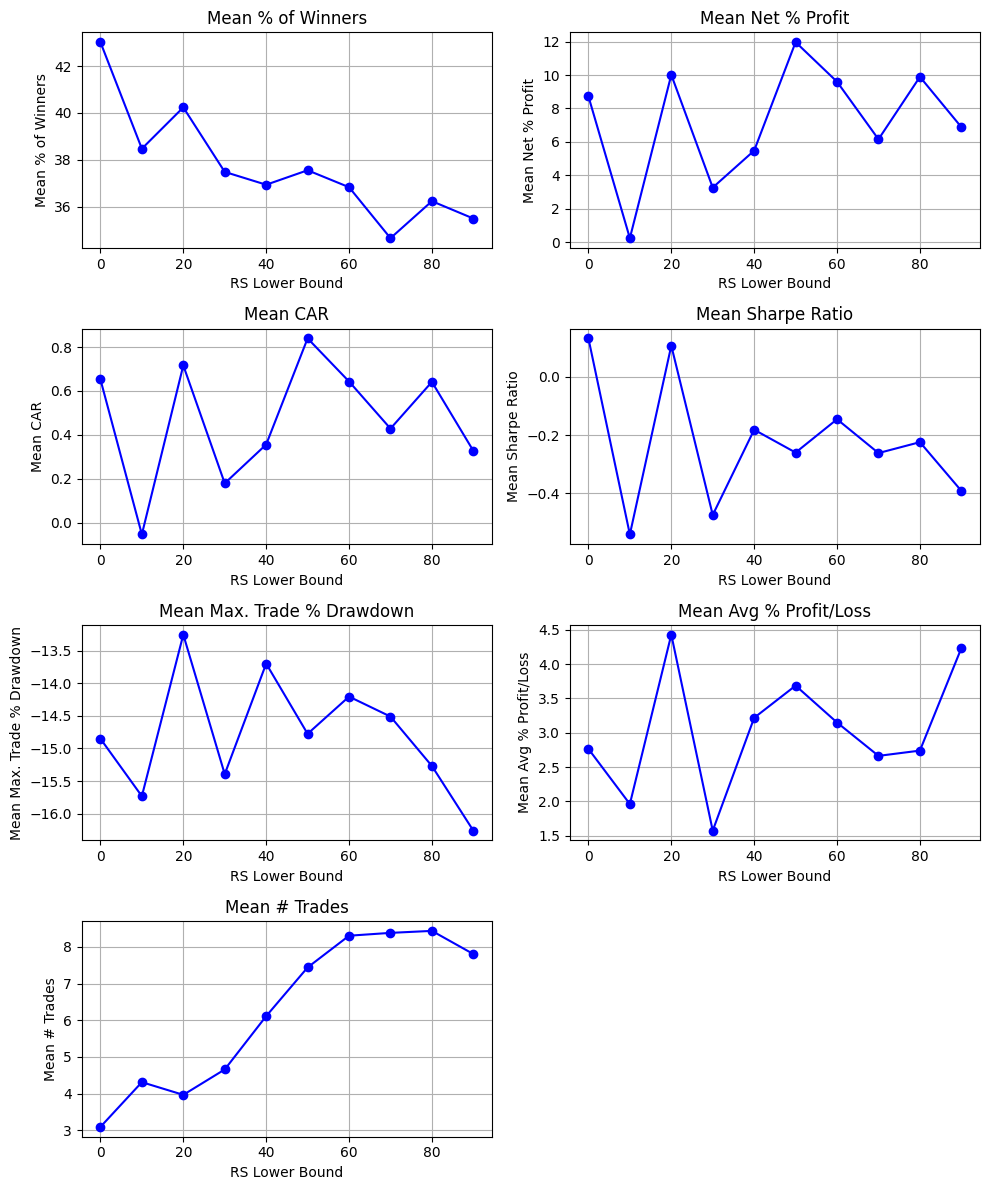

In [4]:
# Grouping and calculating the average
grouped = df.groupby('RS Lower Bound').mean()

# Columns to plot
columns_to_plot = ['% of Winners', 'Net % Profit', 'CAR', 'Sharpe Ratio', 'Max. Trade % Drawdown', 'Avg % Profit/Loss', '# Trades']

# Determine number of rows and columns for the subplot grid
n_cols = 2
n_rows = math.ceil(len(columns_to_plot) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))

# Flatten axes for easy indexing and handle cases where there's an odd number of columns
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    axes[i].plot(grouped.index, grouped[column], marker='o', color='b')
    axes[i].set_title(f'Mean {column}')
    axes[i].set_xlabel('RS Lower Bound')
    axes[i].set_ylabel(f'Mean {column}')
    axes[i].grid(True)

# Hide unused subplots in case of an odd number of columns
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()